# Springy Pendulum Equation

Simulating springy pendulum!



In [75]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.display import HTML
plt.rcParams['figure.figsize'] = [12, 9]

Pendulum coordinate system with angle from ground $\theta$, and displacement from equilibrium $r$.

$$
\begin{align}
x &= r\sin{\theta} \\
y &= -r\cos{\theta}
\end{align}
$$

Pendulum forces

$$
\begin{align}
F_{Gr} &= mg \cos{\theta} & F_{G\theta} &= -mg \sin{\theta} \\
F_{Dr} &= -b\dot{r} & F_{D\theta} &= -b(r + L)\dot{\theta} \\
F_{Sr} &= -kr \\
F_{Rr} &= -l\dot{r}
\end{align}
$$

Putting the forces together combining with Newton's Second Law

$$
\begin{align}
\Sigma F_r = m\ddot{r} &= mg \cos{\theta} - (b + l)\dot{r} - kr \\
\Sigma F_\theta = m(r + L)\ddot{\theta} &= - mg \sin{\theta} - b(r + L)\dot{\theta}
\end{align}
$$

Rearrange for $\ddot{r}$ and $\ddot{\theta}$

$$
\begin{align}
\ddot{r} &= g \cos{\theta} - \frac{b + l}{m}\dot{r} - \frac{k}{m}r \\
\ddot{\theta} &= - \frac{g}{r + L} \sin{\theta} - \frac{b}{m}\dot{\theta}
\end{align}
$$

Declare $\dot{r}$ as a new variable $v$. Likewise, declare $\dot{\theta}$ as $\omega$. Now we have four free variables, $r$, $\theta$, $v$, and $\omega$, that define our state. We define four equations for the changes in these variables.

$$
\begin{align}
\dot{r} &= v \\
\dot{\theta} &= \omega \\
\dot{v} &= g \cos{\theta} - \frac{b + l}{m}v - \frac{k}{m}r \\
\dot{\omega} &= - \frac{g}{r + L} \sin{\theta} - \frac{b}{m}\omega
\end{align}
$$

And vectorize

$$
\begin{pmatrix}
\dot{r} \\
\dot{\theta} \\
\dot{v} \\
\dot{\omega}
\end{pmatrix}
=
\begin{pmatrix}
v \\
\omega \\
g \cos{\theta} - \frac{b + l}{m}v - \frac{k}{m}r \\
- \frac{g}{r + L} \sin{\theta} - \frac{b}{m}\omega
\end{pmatrix}
$$

Create python function

In [65]:
# Acceleration due to gravity
g = 9.81

def springy_pendulum(t, S, L=5, m=1, b=0.25, k=2, l=1):
    """
    Differential equation for springy pendulum
    
    :param t: current time
    :param S: current state of pendulum
    :param L: rest length of pendulum
    :param m: mass of spring pendulum body
    :param b: linear drag coefficient
    :param k: spring elasticity constant
    :param l: spring dampening constant
    """
    r, theta, v, omega = S
    return np.array([
        v,
        omega,
        g*np.cos(theta) - ((b + l)/m) * v - (k/m)*r,
        -(g/(r + L))*np.sin(theta) - (b/m)*omega
    ])

Simulate

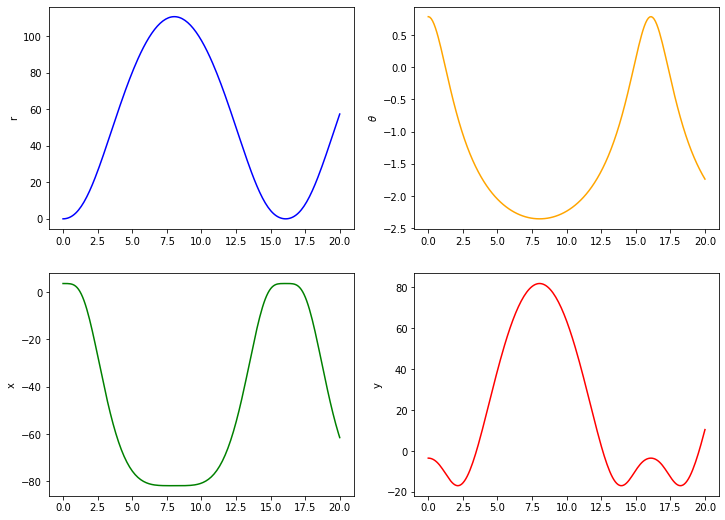

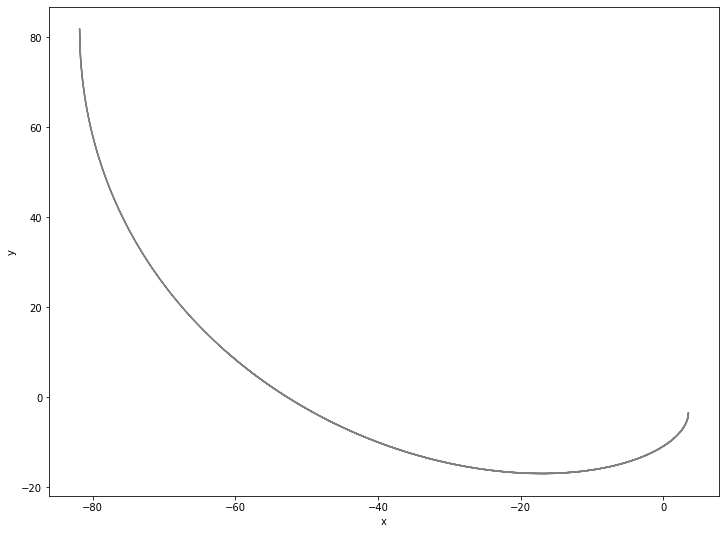

In [86]:
# Parameters and initial conditions
L = 5
m = 1
b = 0.0
k = 0
l = 0.0
S0 = [ 0, np.pi/4, 0, 0 ]
T = [0, 20]

# Get solution
solution = spi.solve_ivp(springy_pendulum, T, S0, args=(L, m, b, k, l), max_step=0.1)

# Convert x, y coordinates
r = solution.y[0,:]
th = solution.y[1,:]
x = (r + L)*np.sin(th)
y = -(r + L)*np.cos(th)

# Plot solution components
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(solution.t, solution.y[0,:], color='blue')
ax1.set_ylabel('r')
ax2.plot(solution.t, solution.y[1,:], color='orange')
ax2.set_ylabel('$\\theta$')
ax3.plot(solution.t, x, color='green')
ax3.set_ylabel('x')
ax4.plot(solution.t, y, color='red')
ax4.set_ylabel('y');

# Plot solution xy coordinates
fig, ax = plt.subplots()
ax.plot(x, y, color='gray')
ax.set_xlabel('x')
ax.set_ylabel('y');

Animate

In [87]:
# Param
size=15

# Setup figure
fig = plt.figure()
ax = plt.axes(xlim=(-size, size), ylim=(-size, size))
ax.set_xticks([])
ax.set_yticks([])

# Create line
line, = ax.plot([], [], lw=1, marker='o')

def animate(i):
    line.set_data([0, x[i]], [0, y[i]])
    return [line]

# Animate
anm = anim.FuncAnimation(
    fig, animate, 
    interval=20,
    frames=x.shape[0],
    blit=True)

plt.close(fig)
HTML(anm.to_html5_video())